In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score

In [3]:
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV

In [4]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix , plot_confusion_matrix 
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve, roc_auc_score 

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score ,matthews_corrcoef

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [8]:
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv('weatherAUS.csv')

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [10]:
df.shape

(145460, 23)

In [14]:
df.isnull().sum().sort_values(ascending=False)


Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [17]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)
# Percentage of null values present in each columns

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

In [32]:
df["RainTomorrow"].value_counts()/len(df)*100

No     75.839406
Yes    21.914616
Name: RainTomorrow, dtype: float64

In [33]:
#the DataFrame to include only the rows where 'RainTomorrow' is 'yes', and then check for missing values in that subset
# Filter rows where 'RainTomorrow' is 'Yes'
yes_rain_data = df[df['RainTomorrow'] == 'Yes']

# Check for missing values in the subset
missing_values_Yes_rain = yes_rain_data.isnull().sum().sort_values(ascending=False)

# Print the missing value counts for each column
print(missing_values_Yes_rain)


Sunshine         15056
Evaporation      14018
Cloud3pm         11589
Cloud9am         11255
Pressure3pm       3113
Pressure9am       3103
WindGustDir       2467
WindGustSpeed     2442
WindDir9am        1921
WindDir3pm        1053
Humidity3pm        964
Temp3pm            742
WindSpeed3pm       683
Rainfall           676
RainToday          676
Humidity9am        534
WindSpeed9am       340
Temp9am            298
MinTemp            175
MaxTemp             55
Date                 0
Location             0
RainTomorrow         0
dtype: int64


In [34]:
#Drop columns that have more than 30% missing values, such as 'Evaporation', 'Sunshine', 'Cloud9am', and 'Cloud3pm
drop_columns = []
for column in df.columns:
    if (df[column].isnull().sum()/len(df))*100 > 30:
        drop_columns.append(column)

In [35]:
drop_columns

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [36]:
data1 = df.drop( drop_columns ,axis=1)

In [37]:
data1.shape

(145460, 19)

In [38]:
data1.isnull().sum().sort_values(ascending=False)


Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [39]:
data1.dropna(axis=0 , subset=['RainTomorrow'] , inplace=True)

In [40]:
data1.shape

(142193, 19)

In [42]:
data1.isnull().sum().sort_values(ascending=False)


Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
RainToday         1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Date                 0
Location             0
RainTomorrow         0
dtype: int64

In [44]:
#categorizes the rows based on the number of missing values in each row. Specifically, 
#it identifies rows with more than 5 missing values (NaN) and stores their row indices in list

i=0
list10=[]
list9=[]
list8=[]
list7=[]
list6=[]

while i<len(df):
    try:
        sum_of_null_values = data1.loc[[i]].isna().sum().sum()
        
        if sum_of_null_values  > 5:
        
            if sum_of_null_values >=10:
                list10.append(i)
            elif sum_of_null_values == 9:
                list9.append(i)
            elif sum_of_null_values == 8:
                list8.append(i)
            elif sum_of_null_values == 7:
                list7.append(i)
            elif sum_of_null_values == 6:
                list6.append(i)
            
    except: pass
    
    i=i+1

In [45]:
print("Number of rows with more than 10 missing values: ", len(list10))
print("Number of rows with 9 missing values: ", len(list9))
print("Number of rows with 8 missing values: ", len(list8))
print("Number of rows with 7 missing values: ", len(list7))
print("Number of rows with 6 missing values: ", len(list6))


Number of rows with more than 10 missing values:  330
Number of rows with 9 missing values:  401
Number of rows with 8 missing values:  999
Number of rows with 7 missing values:  220
Number of rows with 6 missing values:  1185


In [46]:
data1.shape

(142193, 19)

In [47]:
#drop rows from the DataFrame data_1 that have more than or equal to 9 missing (NaN) values based on the indices stored in list10 and list9.
for i in [list10,list9]:
    data1.drop(i , axis=0 , inplace=True)

In [48]:
data1.shape

(141462, 19)

In [49]:
data1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [51]:
data1.isnull().sum()

Date                 0
Location             0
MinTemp            301
MaxTemp            190
Rainfall          1276
WindGustDir       8670
WindGustSpeed     8610
WindDir9am        9351
WindDir3pm        3135
WindSpeed9am       998
WindSpeed3pm      1997
Humidity9am       1428
Humidity3pm       2986
Pressure9am      13322
Pressure3pm      13295
Temp9am            572
Temp3pm           2109
RainToday         1276
RainTomorrow         0
dtype: int64

In [52]:
data1.isnull().sum().sort_values(ascending=False)

Pressure9am      13322
Pressure3pm      13295
WindDir9am        9351
WindGustDir       8670
WindGustSpeed     8610
WindDir3pm        3135
Humidity3pm       2986
Temp3pm           2109
WindSpeed3pm      1997
Humidity9am       1428
Rainfall          1276
RainToday         1276
WindSpeed9am       998
Temp9am            572
MinTemp            301
MaxTemp            190
Date                 0
Location             0
RainTomorrow         0
dtype: int64

In [53]:
only_nan_RainToday = data1.loc[data1['RainToday'].isnull()]
only_nan_RainToday.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,17.3,26.2,NaN,No
284,2009-09-11,Albury,NaN,18.8,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,8.7,18.1,NaN,No
436,2010-02-10,Albury,21.7,35.6,NaN,SSW,46.0,NaN,S,NaN,15.0,64.0,28.0,1018.8,1014.7,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.5,29.1,NaN,SW,24.0,NaN,NNW,NaN,11.0,81.0,67.0,1008.5,1007.8,23.4,26.4,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,21.0,30.0,NaN,No


#### s=only_nan_RainToday   

In [54]:
#convert the categorical values in the 'RainTomorrow' column of DataFrame data_1 to numerical values of 0 and 1
data1['RainTomorrow'] = np.where(data1['RainTomorrow']=='No' , 0 ,1)

## Train Test Split data set

In [55]:
x = data1.drop('RainTomorrow',axis=1)
y= data1['RainTomorrow']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8 , random_state=0 ,stratify=y)

In [58]:
x_train.isnull().sum().sort_values(ascending=False)

Pressure9am      10667
Pressure3pm      10643
WindDir9am        7501
WindGustDir       6902
WindGustSpeed     6853
WindDir3pm        2508
Humidity3pm       2373
Temp3pm           1682
WindSpeed3pm      1587
Humidity9am       1137
RainToday         1023
Rainfall          1023
WindSpeed9am       805
Temp9am            473
MinTemp            234
MaxTemp            158
Location             0
Date                 0
dtype: int64

In [60]:
x_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
83344,2015-09-02,Dartmoor,4.6,12.5,0.0,NNE,37.0,N,NE,13.0,11.0,NaN,NaN,1008.0,1005.1,10.9,10.4,No
10185,2012-03-03,CoffsHarbour,19.0,22.8,20.8,SE,39.0,SW,W,13.0,9.0,96.0,92.0,1019.0,1017.0,19.3,21.0,Yes
34777,2012-07-11,SydneyAirport,10.4,20.8,8.2,WNW,41.0,NNW,N,19.0,22.0,67.0,39.0,1019.9,1017.4,15.0,20.5,Yes
57070,2014-07-20,Ballarat,2.3,10.2,0.0,SSE,24.0,SSE,S,11.0,11.0,100.0,73.0,1028.7,1026.8,6.4,9.7,No
140866,2013-07-19,Darwin,18.9,32.0,0.0,N,35.0,E,N,17.0,24.0,73.0,57.0,1013.1,1009.2,24.9,29.0,No


### Handling categorical missing values in x_train Dataframe

In [63]:
# Calculate the correlation matrix
correlation_matrix = x_train.corr()

# Print the correlation matrix
print(correlation_matrix)

                MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.735884  0.100836       0.176979      0.178662   
MaxTemp        0.735884  1.000000 -0.079533       0.068980      0.016737   
Rainfall       0.100836 -0.079533  1.000000       0.133223      0.085332   
WindGustSpeed  0.176979  0.068980  0.133223       1.000000      0.603670   
WindSpeed9am   0.178662  0.016737  0.085332       0.603670      1.000000   
WindSpeed3pm   0.175502  0.052514  0.054945       0.685455      0.517987   
Humidity9am   -0.236670 -0.507404  0.224590      -0.216604     -0.272672   
Humidity3pm    0.004330 -0.510427  0.255540      -0.029720     -0.034348   
Pressure9am   -0.449654 -0.330746 -0.166936      -0.457908     -0.228810   
Pressure3pm   -0.460441 -0.426168 -0.124501      -0.413014     -0.176364   
Temp9am        0.901841  0.887035  0.006786       0.150372      0.131863   
Temp3pm        0.708589  0.984552 -0.082909       0.033643      0.006412   

           

In [65]:
print(x_train.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object


In [89]:
value_counts = x_train['WindDir3pm'].value_counts()
print(value_counts)

SE     8508
W      7948
S      7634
WSW    7458
SSE    7319
SW     7266
N      6958
WNW    6954
NW     6792
ESE    6714
E      6679
NE     6539
SSW    6402
NNW    6196
ENE    6167
NNE    5127
Name: WindDir3pm, dtype: int64


In [90]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]# Create a new column to store imputed values

    # Get a random sample from the non-missing values to fill the missing values
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # Set the index of the random sample to match the index of missing values
    random_sample.index=df[df[variable].isnull()].index
    # Update the missing values in the new column with the random sample
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [91]:
for i in ['WindGustDir','WindDir9am','WindDir3pm']:
    impute_nan(x_train,i)
    x_train.drop(i,axis=1,inplace=True)

In [92]:
x_train.isnull().sum()

Date                      0
Location                  0
MinTemp                 234
MaxTemp                 158
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                 473
Temp3pm                1682
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
dtype: int64

In [93]:
x_train.isnull().sum().sort_values(ascending=False)

Pressure9am           10667
Pressure3pm           10643
WindGustSpeed          6853
Humidity3pm            2373
Temp3pm                1682
WindSpeed3pm           1587
Humidity9am            1137
Rainfall               1023
RainToday              1023
WindSpeed9am            805
Temp9am                 473
MinTemp                 234
MaxTemp                 158
WindGustDir_random        0
WindDir9am_random         0
Date                      0
Location                  0
WindDir3pm_random         0
dtype: int64

In [106]:
x_train.shape

(113169, 18)

In [107]:
x_train

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random
83344,2015-09-02,Dartmoor,4.6,12.5,0.0,37.0,13.0,11.0,NaN,NaN,1008.0,1005.1,10.9,10.4,No,NNE,N,NE
10185,2012-03-03,CoffsHarbour,19.0,22.8,20.8,39.0,13.0,9.0,96.0,92.0,1019.0,1017.0,19.3,21.0,Yes,SE,SW,W
34777,2012-07-11,SydneyAirport,10.4,20.8,8.2,41.0,19.0,22.0,67.0,39.0,1019.9,1017.4,15.0,20.5,Yes,WNW,NNW,N
57070,2014-07-20,Ballarat,2.3,10.2,0.0,24.0,11.0,11.0,100.0,73.0,1028.7,1026.8,6.4,9.7,No,SSE,SSE,S
140866,2013-07-19,Darwin,18.9,32.0,0.0,35.0,17.0,24.0,73.0,57.0,1013.1,1009.2,24.9,29.0,No,N,E,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79632,2013-09-29,Watsonia,4.1,20.3,0.2,50.0,20.0,26.0,58.0,51.0,1015.1,1011.4,14.1,19.6,No,NNW,N,N
2882,2017-01-19,Albury,14.9,33.3,0.0,24.0,20.0,13.0,52.0,29.0,1011.3,1006.5,20.8,31.5,No,SSE,SSE,SE
86556,2015-09-21,Brisbane,14.2,24.3,1.6,24.0,7.0,9.0,59.0,56.0,1021.0,1017.5,20.8,22.1,Yes,E,S,E
62514,2012-09-24,Sale,7.4,13.3,0.6,63.0,30.0,33.0,78.0,53.0,1015.0,1015.4,8.2,12.1,No,W,W,W


##### Highest_corr

In [113]:
def highest_corr(df, column_name):
    corr_list = []
    for i in df.columns:
        try:
            corr = df[column_name].corr(df[i])
            corr_list.append((i, corr))
        except:
            pass
    # Sort the correlations in ascending order
    corr_list.sort(key=lambda x: x[1], reverse=True)
    for item in corr_list:
        print('Correlation between', column_name, 'and', item[0], 'is', item[1])

In [114]:
highest_corr(x_train,'MinTemp')

Correlation between MinTemp and MinTemp is 1.0
Correlation between MinTemp and Temp9am is 0.9018410385738725
Correlation between MinTemp and MaxTemp is 0.7358839716540279
Correlation between MinTemp and Temp3pm is 0.7085887035045555
Correlation between MinTemp and WindSpeed9am is 0.1786621562442919
Correlation between MinTemp and WindGustSpeed is 0.17697924155922007
Correlation between MinTemp and WindSpeed3pm is 0.17550173370522804
Correlation between MinTemp and Rainfall is 0.10083629820223902
Correlation between MinTemp and Humidity3pm is 0.004329936649267464
Correlation between MinTemp and Humidity9am is -0.23666970015280647
Correlation between MinTemp and Pressure9am is -0.44965425709836293
Correlation between MinTemp and Pressure3pm is -0.460441035623793


In [115]:
highest_corr(x_train,'MaxTemp')

Correlation between MaxTemp and MaxTemp is 1.0
Correlation between MaxTemp and Temp3pm is 0.9845520009395061
Correlation between MaxTemp and Temp9am is 0.8870351788846065
Correlation between MaxTemp and MinTemp is 0.7358839716540279
Correlation between MaxTemp and WindGustSpeed is 0.06897992111496366
Correlation between MaxTemp and WindSpeed3pm is 0.0525143411854652
Correlation between MaxTemp and WindSpeed9am is 0.01673675904978758
Correlation between MaxTemp and Rainfall is -0.07953323383205789
Correlation between MaxTemp and Pressure9am is -0.33074574072614626
Correlation between MaxTemp and Pressure3pm is -0.4261675308481673
Correlation between MaxTemp and Humidity9am is -0.5074043182597318
Correlation between MaxTemp and Humidity3pm is -0.5104266855965788


In [119]:
x_train['MinTemp'].describe()

count    112935.000000
mean         12.185188
std           6.397735
min          -8.200000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [120]:
for i in ['MinTemp','MaxTemp']:
    impute_nan(x_train,i)
    x_train.drop(i,axis=1,inplace=True)

In [121]:
x_train.isnull().sum().sort_values(ascending=False)

Pressure9am           10667
Pressure3pm           10643
WindGustSpeed          6853
Humidity3pm            2373
Temp3pm                1682
WindSpeed3pm           1587
Humidity9am            1137
Rainfall               1023
RainToday              1023
WindSpeed9am            805
Temp9am                 473
WindDir9am_random         0
MinTemp_random            0
WindDir3pm_random         0
Date                      0
WindGustDir_random        0
Location                  0
MaxTemp_random            0
dtype: int64

In [122]:
highest_corr(x_train,'MinTemp_random')

Correlation between MinTemp_random and MinTemp_random is 0.9999999999999999
Correlation between MinTemp_random and Temp9am is 0.900640162945106
Correlation between MinTemp_random and MaxTemp_random is 0.7336261952074625
Correlation between MinTemp_random and Temp3pm is 0.7075133482419993
Correlation between MinTemp_random and WindSpeed9am is 0.17839462698121433
Correlation between MinTemp_random and WindGustSpeed is 0.1768474335692877
Correlation between MinTemp_random and WindSpeed3pm is 0.17520503272208454
Correlation between MinTemp_random and Rainfall is 0.10048918367351017
Correlation between MinTemp_random and Humidity3pm is 0.004229965193592538
Correlation between MinTemp_random and Humidity9am is -0.2364297786482734
Correlation between MinTemp_random and Pressure9am is -0.4490108822266013
Correlation between MinTemp_random and Pressure3pm is -0.45975396465299356


In [123]:
highest_corr(x_train,'MaxTemp_random')

Correlation between MaxTemp_random and MaxTemp_random is 1.0
Correlation between MaxTemp_random and Temp3pm is 0.9837255847805434
Correlation between MaxTemp_random and Temp9am is 0.8860224774742959
Correlation between MaxTemp_random and MinTemp_random is 0.7336261952074624
Correlation between MaxTemp_random and WindGustSpeed is 0.0690111209948527
Correlation between MaxTemp_random and WindSpeed3pm is 0.052566863140025344
Correlation between MaxTemp_random and WindSpeed9am is 0.016875368126709655
Correlation between MaxTemp_random and Rainfall is -0.07932179862875323
Correlation between MaxTemp_random and Pressure9am is -0.3306264825163019
Correlation between MaxTemp_random and Pressure3pm is -0.4259088446193108
Correlation between MaxTemp_random and Humidity9am is -0.5069876153503229
Correlation between MaxTemp_random and Humidity3pm is -0.5099028448516041


In [124]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                 473
Temp3pm                1682
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [125]:
highest_corr(x_train,'Pressure9am')

Correlation between Pressure9am and Pressure9am is 1.0
Correlation between Pressure9am and Pressure3pm is 0.961273443753516
Correlation between Pressure9am and Humidity9am is 0.14122252344487873
Correlation between Pressure9am and Humidity3pm is -0.026119283393258263
Correlation between Pressure9am and Rainfall is -0.16693620527181494
Correlation between Pressure9am and WindSpeed9am is -0.22880985687453947
Correlation between Pressure9am and Temp3pm is -0.2858418150715324
Correlation between Pressure9am and WindSpeed3pm is -0.2957003261323009
Correlation between Pressure9am and MaxTemp_random is -0.33062648251630194
Correlation between Pressure9am and Temp9am is -0.4213342524094301
Correlation between Pressure9am and MinTemp_random is -0.4490108822266013
Correlation between Pressure9am and WindGustSpeed is -0.45790802696977767


correlation between  Pressure9am and  Pressure3pm  is  0.9612734437535151 which is very high and 
we can see that missing values in both case is also quite high so if we use random computing then we 
should remove one of the column becase otherwise it will affect both the feature(correlation will differ)

#### Fill the missing values in the 'Temp3pm' and 'Temp9am' columns.

In [128]:
#creating a new DataFrame single_temp9am_df from a single column 'Temp9am' of your existing x_train DataFrame. 
single_temp9am_df = x_train['Temp9am'].to_frame()
single_temp9am_df

,Temp9am
83344,10.9
10185,19.3
34777,15.0
57070,6.4
140866,24.9
...,...
79632,14.1
2882,20.8
86556,20.8
62514,8.2


In [131]:
#single_temp9am_df_only_nan is a new DataFrame that contains only the rows where the 'Temp9am' column has missing values (NaN)
single_temp9am_df_only_nan = single_temp9am_df.loc[single_temp9am_df['Temp9am'].isnull()]
single_temp9am_df_only_nan.index

Int64Index([ 55940,  52893, 142830,  97572, 115371,  52273,  52071,  53328,
             29064,  96771,
            ...
             52895,  76074,  49480,  53103,  53184,  29061,  54028,  56765,
             52906,  53141],
           dtype='int64', length=473)

In [132]:
# single_temp9am_df_without_nan is a new DataFrame that contains only the rows where the 'Temp9am' column has No missing values (NaN)
single_temp9am_df_without_nan = x_train['Temp9am'].to_frame().dropna()
single_temp9am_df_without_nan

,Temp9am
83344,10.9
10185,19.3
34777,15.0
57070,6.4
140866,24.9
...,...
79632,14.1
2882,20.8
86556,20.8
62514,8.2


In [138]:
#new DataFrame Two_col_without_nan by selecting specific columns ('MinTemp_random' and 'MaxTemp_random') from your x_train DataFrame, 
#and then dropping the rows with missing values using the indices from the DataFrame single_temp9am_df_only_nan
Two_col_without_nan = x_train[['MinTemp_random','MaxTemp_random']].drop(single_temp9am_df_only_nan.index,axis=0)
Two_col_without_nan.shape

(112696, 2)

In [139]:
lm1 = LinearRegression()

In [140]:
lm1.fit(X = Two_col_without_nan ,y = single_temp9am_df_without_nan)

LinearRegression()

In [141]:
y_pred = lm1.predict(Two_col_without_nan)

In [143]:
r2_score(single_temp9am_df_without_nan , y_pred)

0.9215482608976299

In [148]:
single_temp9am_df_only_nan = single_temp9am_df.loc[single_temp9am_df['Temp9am'].isnull()]
single_temp9am_df_only_nan.index

Int64Index([ 55940,  52893, 142830,  97572, 115371,  52273,  52071,  53328,
             29064,  96771,
            ...
             52895,  76074,  49480,  53103,  53184,  29061,  54028,  56765,
             52906,  53141],
           dtype='int64', length=473)

In [149]:
ls = single_temp9am_df_only_nan.index.to_list()

In [150]:
len(ls)

473

In [151]:
for i in ls:
    x_train['Temp9am'][i] = lm1.predict([[x_train['MinTemp_random'][i],x_train['MaxTemp_random'][i]]])

In [152]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                   0
Temp3pm                1682
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [153]:
highest_corr(x_train,'Temp3pm')

Correlation between Temp3pm and Temp3pm is 1.0
Correlation between Temp3pm and MaxTemp_random is 0.9837255847805434
Correlation between Temp3pm and Temp9am is 0.8612325677148042
Correlation between Temp3pm and MinTemp_random is 0.7075133482419993
Correlation between Temp3pm and WindGustSpeed is 0.03364252907793921
Correlation between Temp3pm and WindSpeed3pm is 0.03014816164196869
Correlation between Temp3pm and WindSpeed9am is 0.006411531083823893
Correlation between Temp3pm and Rainfall is -0.08290852278397162
Correlation between Temp3pm and Pressure9am is -0.2858418150715324
Correlation between Temp3pm and Pressure3pm is -0.3888826694808966
Correlation between Temp3pm and Humidity9am is -0.5011811396095655
Correlation between Temp3pm and Humidity3pm is -0.5589638474915821


In [154]:
a = x_train['Temp3pm'].to_frame()

In [155]:
aa = a.loc[a['Temp3pm'].isnull()]
aa.index

Int64Index([142396,  16529, 143855, 111139, 143535, 143513,  17538,  43030,
            111289,  86052,
            ...
             29061,   3040, 111527, 110940, 143879, 143293, 108916, 143553,
            143581, 143223],
           dtype='int64', length=1682)

In [156]:
z = x_train['Temp3pm'].to_frame().dropna()
z

,Temp3pm
83344,10.4
10185,21.0
34777,20.5
57070,9.7
140866,29.0
...,...
79632,19.6
2882,31.5
86556,22.1
62514,12.1


In [157]:
s = x_train['MaxTemp_random'].to_frame().drop(aa.index,axis=0)
s.shape

(111487, 1)

In [158]:
lm2 = LinearRegression()

In [159]:
lm2.fit(X = s ,y = z)

LinearRegression()

In [160]:
y_pred = lm2.predict(s)

In [161]:
r2_score(z , y_pred)

0.967716026151824

In [162]:
ls = aa.index.to_list()

In [163]:
len(ls)

1682

In [164]:
for i in ls:
    x_train['Temp3pm'][i] = lm2.predict([[x_train['MaxTemp_random'][i]]])

In [165]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10667
Pressure3pm           10643
Temp9am                   0
Temp3pm                   0
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [167]:
highest_corr(x_train,'Pressure9am')

Correlation between Pressure9am and Pressure9am is 1.0
Correlation between Pressure9am and Pressure3pm is 0.961273443753516
Correlation between Pressure9am and Humidity9am is 0.14122252344487873
Correlation between Pressure9am and Humidity3pm is -0.026119283393258263
Correlation between Pressure9am and Rainfall is -0.16693620527181494
Correlation between Pressure9am and WindSpeed9am is -0.22880985687453947
Correlation between Pressure9am and Temp3pm is -0.28889741144325415
Correlation between Pressure9am and WindSpeed3pm is -0.2957003261323009
Correlation between Pressure9am and MaxTemp_random is -0.33062648251630194
Correlation between Pressure9am and Temp9am is -0.4211739703052991
Correlation between Pressure9am and MinTemp_random is -0.4490108822266013
Correlation between Pressure9am and WindGustSpeed is -0.45790802696977767


In [168]:
x_train['Pressure9am'].isnull().sum()/len(x_train)

0.0942572612641271

In [169]:
x_train.head()

,Date,Location,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random
83344,2015-09-02,Dartmoor,0.0,37.0,13.0,11.0,NaN,NaN,1008.0,1005.1,10.9,10.4,No,NNE,N,NE,4.6,12.5
10185,2012-03-03,CoffsHarbour,20.8,39.0,13.0,9.0,96.0,92.0,1019.0,1017.0,19.3,21.0,Yes,SE,SW,W,19.0,22.8
34777,2012-07-11,SydneyAirport,8.2,41.0,19.0,22.0,67.0,39.0,1019.9,1017.4,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8
57070,2014-07-20,Ballarat,0.0,24.0,11.0,11.0,100.0,73.0,1028.7,1026.8,6.4,9.7,No,SSE,SSE,S,2.3,10.2
140866,2013-07-19,Darwin,0.0,35.0,17.0,24.0,73.0,57.0,1013.1,1009.2,24.9,29.0,No,N,E,N,18.9,32.0


In [170]:
x_train['Pressure9am'].corr(y_train)

-0.2459880651193552

In [171]:
x_train['Pressure3pm'].corr(y_train)

-0.2254596165634148

In [172]:
q = x_train.loc[x_train['Pressure9am'].isnull()]
q['Pressure3pm'].isnull().sum()

10490

In [173]:
q['Pressure3pm'].notnull().sum()

177

In [174]:
a = x_train['Pressure9am'].to_frame()

In [175]:
aa = a.loc[a['Pressure9am'].isnull()]
aa.index

Int64Index([126534,  16529, 126088,  15497,  25923, 126251,  54351,  52866,
             54959, 135750,
            ...
             17311,  26481,  54801,  27157, 123983,  24997, 112474,  54831,
             54615,  17208],
           dtype='int64', length=10667)

In [176]:
z = x_train['Temp9am'].to_frame().dropna()
z

,Temp9am
83344,10.9
10185,19.3
34777,15.0
57070,6.4
140866,24.9
...,...
79632,14.1
2882,20.8
86556,20.8
62514,8.2


In [177]:
s = x_train['Pressure3pm'].drop(aa.index,axis=0).to_frame()
s.shape

(102502, 1)

In [178]:
s.isnull().sum()

Pressure3pm    153
dtype: int64

In [179]:
sa = s.loc[s['Pressure3pm'].isnull()]
sa.index

Int64Index([143094,  34256,  31223,  98746,   8088,   1059,  49589,  49509,
             18126, 117727,
            ...
             55503,   9335,  27634,  10775, 117176, 128601,  41008,   9564,
              3040,  33944],
           dtype='int64', length=153)

In [180]:
z = x_train['Pressure9am'].drop(sa.index,axis=0).to_frame()
z.shape

(113016, 1)

In [181]:
z.isnull().sum()

Pressure9am    10667
dtype: int64

In [182]:
cc = z['Pressure9am'].dropna().to_frame()
cc.shape

(102349, 1)

In [183]:
dc = s['Pressure3pm'].dropna().to_frame()
dc.shape

(102349, 1)

In [184]:
lm3 = LinearRegression()

In [185]:
lm3.fit(X = dc ,y = cc)

LinearRegression()

In [186]:
y_pred = lm3.predict(dc)

In [187]:
r2_score(cc , y_pred)

0.9240466336657429

In [188]:
q = x_train.loc[x_train['Pressure9am'].isnull()]
q['Pressure3pm'].isnull().sum()

10490

In [189]:
q['Pressure3pm'].notnull().sum()


177

In [190]:
q.loc[q['Pressure3pm'].notnull()]

,Date,Location,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random
55940,2011-03-19,Ballarat,0.0,50.0,28.0,22.0,NaN,64.0,NaN,1011.5,14.254965,19.9,No,SE,ESE,ESE,8.6,21.6
115371,2011-01-22,PearceRAAF,0.0,NaN,NaN,22.0,NaN,20.0,NaN,1007.9,26.165662,31.7,No,NE,E,WSW,17.3,37.5
96771,2009-09-25,Adelaide,2.8,63.0,13.0,19.0,NaN,73.0,NaN,1003.1,12.982421,10.8,Yes,W,NW,W,11.8,14.8
109049,2010-03-24,Albany,13.4,NaN,0.0,37.0,82.0,79.0,NaN,1013.8,22.000000,22.4,Yes,S,WSW,SW,19.4,23.6
9653,2010-08-19,CoffsHarbour,0.0,52.0,7.0,7.0,67.0,39.0,NaN,1010.8,18.900000,25.4,No,NNW,WSW,E,14.5,25.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34784,2012-07-18,SydneyAirport,0.0,31.0,13.0,13.0,62.0,37.0,NaN,1015.8,11.500000,18.1,No,W,W,SW,9.0,21.3
144243,2014-02-25,Uluru,NaN,28.0,NaN,7.0,NaN,49.0,NaN,1010.1,14.273332,26.7,NaN,E,NNE,NE,4.1,27.2
49480,2010-03-03,Tuggeranong,NaN,28.0,NaN,13.0,NaN,34.0,NaN,1015.8,15.827262,25.8,NaN,ESE,SSE,ENE,7.4,26.6
6563,2010-05-30,Cobar,4.6,39.0,19.0,11.0,98.0,83.0,NaN,1007.9,11.200000,13.2,Yes,SW,WSW,W,9.4,13.3


In [191]:
t = q.loc[q['Pressure3pm'].notnull()]
t.index

Int64Index([ 55940, 115371,  96771, 109049,   9653,  18529,  58614,  43634,
            108332,  46728,
            ...
             41063,   9755,  23593, 130409,  62688,  34784, 144243,  49480,
              6563,  57380],
           dtype='int64', length=177)

In [192]:
ls = t.index.to_list()

In [193]:
len(ls)

177

In [194]:
for i in ls:
    x_train['Pressure9am'][i] = lm3.predict([[x_train['Pressure3pm'][i]]])

In [195]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Pressure9am           10490
Pressure3pm           10643
Temp9am                   0
Temp3pm                   0
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
dtype: int64

In [196]:
x_train['Pressure9am_missing'] = np.where(x_train['Pressure9am'].isnull(),1,0)

In [197]:
x_train.head()

,Date,Location,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing
83344,2015-09-02,Dartmoor,0.0,37.0,13.0,11.0,NaN,NaN,1008.0,1005.1,10.9,10.4,No,NNE,N,NE,4.6,12.5,0
10185,2012-03-03,CoffsHarbour,20.8,39.0,13.0,9.0,96.0,92.0,1019.0,1017.0,19.3,21.0,Yes,SE,SW,W,19.0,22.8,0
34777,2012-07-11,SydneyAirport,8.2,41.0,19.0,22.0,67.0,39.0,1019.9,1017.4,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0
57070,2014-07-20,Ballarat,0.0,24.0,11.0,11.0,100.0,73.0,1028.7,1026.8,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0
140866,2013-07-19,Darwin,0.0,35.0,17.0,24.0,73.0,57.0,1013.1,1009.2,24.9,29.0,No,N,E,N,18.9,32.0,0


In [198]:
x_train['Pressure9am_missing'].value_counts()

0    102679
1     10490
Name: Pressure9am_missing, dtype: int64

In [199]:
impute_nan(x_train,'Pressure9am')

In [200]:
x_train.drop(['Pressure3pm','Pressure9am'],axis=1,inplace=True)

In [201]:
x_train.isnull().sum()

Date                      0
Location                  0
Rainfall               1023
WindGustSpeed          6853
WindSpeed9am            805
WindSpeed3pm           1587
Humidity9am            1137
Humidity3pm            2373
Temp9am                   0
Temp3pm                   0
RainToday              1023
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
Pressure9am_missing       0
Pressure9am_random        0
dtype: int64

In [203]:
highest_corr(x_train,'Pressure9am_random')

Correlation between Pressure9am_random and Pressure9am_random is 1.0
Correlation between Pressure9am_random and Humidity9am is 0.12876501977343358
Correlation between Pressure9am_random and Pressure9am_missing is 0.005390014047716073
Correlation between Pressure9am_random and Humidity3pm is -0.022841208085817147
Correlation between Pressure9am_random and Rainfall is -0.15268816555164272
Correlation between Pressure9am_random and WindSpeed9am is -0.20653533939992577
Correlation between Pressure9am_random and Temp3pm is -0.2572345655684341
Correlation between Pressure9am_random and WindSpeed3pm is -0.2664057411818627
Correlation between Pressure9am_random and MaxTemp_random is -0.29476190411956965
Correlation between Pressure9am_random and Temp9am is -0.37761593815221195
Correlation between Pressure9am_random and MinTemp_random is -0.40431673061127166
Correlation between Pressure9am_random and WindGustSpeed is -0.420383301590696


In [204]:
highest_corr(x_train,'Pressure9am_missing')

Correlation between Pressure9am_missing and Pressure9am_missing is 0.9999999999999998
Correlation between Pressure9am_missing and Humidity9am is 0.06288659464980095
Correlation between Pressure9am_missing and Humidity3pm is 0.03447053385157897
Correlation between Pressure9am_missing and Pressure9am_random is 0.005390014047716073
Correlation between Pressure9am_missing and Rainfall is -0.00034573045140158423
Correlation between Pressure9am_missing and WindGustSpeed is -0.03145337823695539
Correlation between Pressure9am_missing and MaxTemp_random is -0.09604210571315218
Correlation between Pressure9am_missing and Temp3pm is -0.09760404368164657
Correlation between Pressure9am_missing and WindSpeed9am is -0.1040978064461976
Correlation between Pressure9am_missing and Temp9am is -0.11816011317122432
Correlation between Pressure9am_missing and MinTemp_random is -0.12897499435667378
Correlation between Pressure9am_missing and WindSpeed3pm is -0.15490891484282038


In [205]:
highest_corr(x_train,'WindGustSpeed')

Correlation between WindGustSpeed and WindGustSpeed is 1.0
Correlation between WindGustSpeed and WindSpeed3pm is 0.685454624151629
Correlation between WindGustSpeed and WindSpeed9am is 0.6036696351601752
Correlation between WindGustSpeed and MinTemp_random is 0.17684743356928773
Correlation between WindGustSpeed and Temp9am is 0.14710661452282967
Correlation between WindGustSpeed and Rainfall is 0.13322285452173546
Correlation between WindGustSpeed and MaxTemp_random is 0.0690111209948527
Correlation between WindGustSpeed and Temp3pm is 0.030313252386384812
Correlation between WindGustSpeed and Humidity3pm is -0.029720220835571996
Correlation between WindGustSpeed and Pressure9am_missing is -0.03145337823695538
Correlation between WindGustSpeed and Humidity9am is -0.216603531314966
Correlation between WindGustSpeed and Pressure9am_random is -0.4203833015906959


In [206]:
impute_nan(x_train,'WindGustSpeed')

In [207]:
x_train.drop(['WindGustSpeed'],axis=1,inplace=True)

In [208]:
highest_corr(x_train,'WindGustSpeed_random')

Correlation between WindGustSpeed_random and WindGustSpeed_random is 1.0
Correlation between WindGustSpeed_random and WindSpeed3pm is 0.6413649030402974
Correlation between WindGustSpeed_random and WindSpeed9am is 0.564055453990559
Correlation between WindGustSpeed_random and MinTemp_random is 0.16753698932455396
Correlation between WindGustSpeed_random and Temp9am is 0.13982831975942095
Correlation between WindGustSpeed_random and Rainfall is 0.1232965049789151
Correlation between WindGustSpeed_random and MaxTemp_random is 0.0652218205141152
Correlation between WindGustSpeed_random and Temp3pm is 0.02830306693369673
Correlation between WindGustSpeed_random and Pressure9am_missing is -0.027949772467501407
Correlation between WindGustSpeed_random and Humidity3pm is -0.02893907876077024
Correlation between WindGustSpeed_random and Humidity9am is -0.20699151689955775
Correlation between WindGustSpeed_random and Pressure9am_random is -0.39402887461122266


In [209]:
x_train.isnull().sum()

Date                       0
Location                   0
Rainfall                1023
WindSpeed9am             805
WindSpeed3pm            1587
Humidity9am             1137
Humidity3pm             2373
Temp9am                    0
Temp3pm                    0
RainToday               1023
WindGustDir_random         0
WindDir9am_random          0
WindDir3pm_random          0
MinTemp_random             0
MaxTemp_random             0
Pressure9am_missing        0
Pressure9am_random         0
WindGustSpeed_random       0
dtype: int64

In [210]:
for i in ['WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm']:
    impute_nan(x_train,i)
    x_train.drop(i,axis=1,inplace=True)

In [211]:
x_train.isnull().sum()

Date                       0
Location                   0
Rainfall                1023
Temp9am                    0
Temp3pm                    0
RainToday               1023
WindGustDir_random         0
WindDir9am_random          0
WindDir3pm_random          0
MinTemp_random             0
MaxTemp_random             0
Pressure9am_missing        0
Pressure9am_random         0
WindGustSpeed_random       0
WindSpeed9am_random        0
WindSpeed3pm_random        0
Humidity9am_random         0
Humidity3pm_random         0
dtype: int64

In [212]:
ss = x_train.loc[x_train['RainToday'].isnull()]

In [213]:
ss['Rainfall'].isnull().sum()

1023

That means 1023 rows have null values in both 'RainToday' & 'Rainfall' features

In [214]:
x_train.shape

(113169, 18)

In [215]:
len(df)

145460

In [216]:
zx = pd.concat([x_train,y_train], axis=1, join='inner')

In [217]:
zx.head()

,Date,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,RainTomorrow
83344,2015-09-02,Dartmoor,0.0,10.9,10.4,No,NNE,N,NE,4.6,12.5,0,1008.0,37.0,13.0,11.0,24.0,58.0,1
10185,2012-03-03,CoffsHarbour,20.8,19.3,21.0,Yes,SE,SW,W,19.0,22.8,0,1019.0,39.0,13.0,9.0,96.0,92.0,1
34777,2012-07-11,SydneyAirport,8.2,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0,0
57070,2014-07-20,Ballarat,0.0,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0,0
140866,2013-07-19,Darwin,0.0,24.9,29.0,No,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0,0


In [218]:
cc = zx.loc[zx['RainTomorrow']==0]

In [219]:
len(cc)

87822

In [220]:
len(cc.loc[cc['Rainfall']<1])

72907

In [221]:
len(cc.loc[cc['RainToday']=='No'])

73848

In [222]:
cc.head()

,Date,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,RainTomorrow
34777,2012-07-11,SydneyAirport,8.2,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0,0
57070,2014-07-20,Ballarat,0.0,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0,0
140866,2013-07-19,Darwin,0.0,24.9,29.0,No,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0,0
62285,2012-02-08,Sale,0.0,16.0,19.1,No,E,WSW,E,13.5,21.1,0,1014.6,31.0,13.0,11.0,60.0,47.0,0
121390,2010-07-23,Perth,0.0,11.6,19.8,No,NNE,ENE,SSE,3.3,20.3,0,1032.0,19.0,9.0,2.0,59.0,37.0,0


In [223]:
x_train.isnull().sum()

Date                       0
Location                   0
Rainfall                1023
Temp9am                    0
Temp3pm                    0
RainToday               1023
WindGustDir_random         0
WindDir9am_random          0
WindDir3pm_random          0
MinTemp_random             0
MaxTemp_random             0
Pressure9am_missing        0
Pressure9am_random         0
WindGustSpeed_random       0
WindSpeed9am_random        0
WindSpeed3pm_random        0
Humidity9am_random         0
Humidity3pm_random         0
dtype: int64

In [224]:
x_train.shape

(113169, 18)

In [225]:
t= x_train.loc[x_train['RainToday'].isnull()]
t.shape

(1023, 18)

In [226]:
s = t.index.to_list()

In [227]:
x_train.dropna(inplace=True)

In [228]:
x_train.shape

(112146, 18)

In [229]:
y_train.drop(s,axis=0,inplace=True)

In [230]:
y_train.shape

(112146,)

let's apply all this computation to handle the missing values in test dataset

In [231]:
x_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
66,2009-02-05,Albury,21.5,41.2,0.0,WSW,35.0,SSE,S,7.0,19.0,48.0,15.0,1005.9,1002.6,26.5,39.7,No
1110,2012-01-15,Albury,15.1,31.0,0.0,NNE,41.0,SE,SSE,15.0,9.0,52.0,37.0,1017.6,1014.5,20.7,29.7,No
60771,2016-05-11,Bendigo,8.6,14.9,1.4,WNW,41.0,NW,NW,11.0,19.0,86.0,88.0,1016.9,1013.2,10.1,12.5,Yes
127979,2012-03-26,Walpole,14.5,24.4,0.0,W,41.0,NW,W,15.0,24.0,64.0,51.0,1015.7,1013.6,20.1,23.8,No
107051,2013-04-28,Woomera,13.9,32.1,0.0,NNW,35.0,N,WNW,17.0,17.0,17.0,6.0,1018.9,1015.9,20.0,30.7,No


In [232]:
x_test.isnull().sum()

Date                0
Location            0
MinTemp            67
MaxTemp            32
Rainfall          253
WindGustDir      1768
WindGustSpeed    1757
WindDir9am       1850
WindDir3pm        627
WindSpeed9am      193
WindSpeed3pm      410
Humidity9am       291
Humidity3pm       613
Pressure9am      2655
Pressure3pm      2652
Temp9am            99
Temp3pm           427
RainToday         253
dtype: int64

In [234]:
def impute_nan_test(df,variable,df2):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df2[variable+"_random"].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [235]:
for i in ['WindGustDir','WindDir9am','WindDir3pm','MinTemp','MaxTemp']:
    impute_nan_test(x_test,i,x_train)
    x_test.drop(i,axis=1,inplace=True)

In [236]:
a = x_test['Temp9am'].to_frame()

In [237]:
aa = a.loc[a['Temp9am'].isnull()]
aa.index

Int64Index([ 53542,  75443,  52959,  52177,   3448,  75591,  53106, 142405,
             53469,  52905,   3540,  81123,  11499,  75403,  53116,  52907,
             52891, 143645,  53559,  53409,  53250,  52386,  24521,  53041,
             79878,  52075, 111340,  47054,  24670,  75121,  27785,  49230,
            143334,  53278,  53066,  52934,   6209, 143524,  53145,  53526,
             53171,  53094,  28776,  53104,  75546,  50643,  75848,  29063,
             52140,  53271,  53234,  52887,  23709,  79536,  53591,  43280,
             79856,  53365,  56700,  43053,  56764,  47060, 143676,  52132,
             27670,  52945,  53225, 117286,  43013,  52993,  52902,  52334,
             53152,  49612,  52904, 142535,  23528,  53215,  53481,  52159,
             52958,  53196, 143703,  52163, 142309,  53229,  52871,  52394,
             79879,  52175,  52992,  40941,  53389,  27584,  53519,  53350,
             79871,  53584,  53356],
           dtype='int64')

In [238]:
ls = aa.index.to_list()
len(ls)

99

In [239]:
for i in ls:
    x_test['Temp9am'][i] = lm1.predict([[x_test['MinTemp_random'][i],x_test['MaxTemp_random'][i]]])

In [240]:
a = x_test['Temp3pm'].to_frame()

In [241]:
aa = a.loc[a['Temp3pm'].isnull()]
aa.index

Int64Index([ 18504,  17596, 111579, 143752, 111525, 111056, 143207, 142537,
            143636, 111513,
            ...
            111018, 142403, 143352, 111260, 143835, 110969,  53356, 143803,
            143388,  16368],
           dtype='int64', length=427)

In [242]:
ls = aa.index.to_list()
len(ls)

427

In [243]:
for i in ls:
    x_test['Temp3pm'][i] = lm2.predict([[x_test['MaxTemp_random'][i]]])

In [244]:
q = x_test.loc[x_test['Pressure9am'].isnull()]

In [245]:
t = q.loc[q['Pressure3pm'].notnull()]
t.index

Int64Index([ 46863,   5457, 114815,   3448,  98677,  34521,   3540,  11499,
             30260,  34566,  34517, 134853, 118457,  31167,  62215,  27785,
             49230,   6209,   7870, 122052,  21528,  43442,  34260,  23709,
              7969,  46438,   6847,  43460,  27670, 117286,  49612,  46534,
              7960,  23528, 114782,  40941,  27584,  46853],
           dtype='int64')

In [246]:
ls = t.index.to_list()

In [247]:
len(ls)

38

In [248]:
for i in ls:
    x_test['Pressure9am'][i] = lm3.predict([[x_test['Pressure3pm'][i]]])

In [249]:
x_test['Pressure9am_missing'] = np.where(x_test['Pressure9am'].isnull(),1,0)

In [250]:
impute_nan_test(x_test,'Pressure9am',x_train)

In [251]:
x_test.drop(['Pressure3pm','Pressure9am'],axis=1,inplace=True)

In [252]:
impute_nan_test(x_test,'WindGustSpeed',x_train)

In [253]:
x_test.drop('WindGustSpeed',axis=1,inplace=True)

In [254]:
for i in ['WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm']:
    impute_nan_test(x_test,i,x_train)
    x_test.drop(i,axis=1,inplace=True)

In [255]:
x_test.isnull().sum()

Date                      0
Location                  0
Rainfall                253
Temp9am                   0
Temp3pm                   0
RainToday               253
WindGustDir_random        0
WindDir9am_random         0
WindDir3pm_random         0
MinTemp_random            0
MaxTemp_random            0
Pressure9am_missing       0
Pressure9am_random        0
WindGustSpeed_random      0
WindSpeed9am_random       0
WindSpeed3pm_random       0
Humidity9am_random        0
Humidity3pm_random        0
dtype: int64

In [256]:
t= x_test.loc[x_test['RainToday'].isnull()]
t.shape

(253, 18)

In [257]:
s = t.index.to_list()

In [258]:
y_test.drop(s,axis=0,inplace=True)

In [259]:
x_test.dropna(inplace=True)

In [260]:
x_test.shape

(28040, 18)

In [261]:
y_test.shape

(28040,)

In [262]:
x_train.shape

(112146, 18)

In [263]:
y_train.shape

(112146,)

In [264]:
x_train.head()

,Date,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random
83344,2015-09-02,Dartmoor,0.0,10.9,10.4,No,NNE,N,NE,4.6,12.5,0,1008.0,37.0,13.0,11.0,24.0,58.0
10185,2012-03-03,CoffsHarbour,20.8,19.3,21.0,Yes,SE,SW,W,19.0,22.8,0,1019.0,39.0,13.0,9.0,96.0,92.0
34777,2012-07-11,SydneyAirport,8.2,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0
57070,2014-07-20,Ballarat,0.0,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0
140866,2013-07-19,Darwin,0.0,24.9,29.0,No,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0


In [265]:
x_train['Date'] = pd.to_datetime(x_train['Date'])

In [266]:
x_train['Date']

83344    2015-09-02
10185    2012-03-03
34777    2012-07-11
57070    2014-07-20
140866   2013-07-19
            ...    
79632    2013-09-29
2882     2017-01-19
86556    2015-09-21
62514    2012-09-24
114008   2015-10-23
Name: Date, Length: 112146, dtype: datetime64[ns]

In [267]:
x_train['month'] = x_train['Date'].dt.month
x_train['day'] = x_train['Date'].dt.day

In [268]:
x_train.drop('Date',axis=1,inplace=True)

In [269]:
x_train.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
83344,Dartmoor,0.0,10.9,10.4,No,NNE,N,NE,4.6,12.5,0,1008.0,37.0,13.0,11.0,24.0,58.0,9,2
10185,CoffsHarbour,20.8,19.3,21.0,Yes,SE,SW,W,19.0,22.8,0,1019.0,39.0,13.0,9.0,96.0,92.0,3,3
34777,SydneyAirport,8.2,15.0,20.5,Yes,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0,7,11
57070,Ballarat,0.0,6.4,9.7,No,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0,7,20
140866,Darwin,0.0,24.9,29.0,No,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0,7,19


In [270]:
x_train['RainToday'] = np.where(x_train['RainToday']=='Yes',1,0)
x_test['RainToday'] = np.where(x_test['RainToday']=='Yes',1,0)

In [271]:
x_train.shape

(112146, 19)

In [272]:
x_train.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
83344,Dartmoor,0.0,10.9,10.4,0,NNE,N,NE,4.6,12.5,0,1008.0,37.0,13.0,11.0,24.0,58.0,9,2
10185,CoffsHarbour,20.8,19.3,21.0,1,SE,SW,W,19.0,22.8,0,1019.0,39.0,13.0,9.0,96.0,92.0,3,3
34777,SydneyAirport,8.2,15.0,20.5,1,WNW,NNW,N,10.4,20.8,0,1019.9,41.0,19.0,22.0,67.0,39.0,7,11
57070,Ballarat,0.0,6.4,9.7,0,SSE,SSE,S,2.3,10.2,0,1028.7,24.0,11.0,11.0,100.0,73.0,7,20
140866,Darwin,0.0,24.9,29.0,0,N,E,N,18.9,32.0,0,1013.1,35.0,17.0,24.0,73.0,57.0,7,19


In [273]:
x_train.isnull().sum().sum()

0

In [274]:
x_test.isnull().sum().sum()

0

In [275]:
x_test['Date'] = pd.to_datetime(x_test['Date'])

In [276]:
x_test['month'] = x_test['Date'].dt.month
x_test['day'] = x_test['Date'].dt.day

In [277]:
x_test.drop('Date',axis=1,inplace=True)

In [278]:
x_test.shape

(28040, 19)

In [279]:
x_test.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
66,Albury,0.0,26.5,39.7,0,WSW,SSE,S,21.5,41.2,0,1005.9,35.0,7.0,19.0,48.0,15.0,2,5
1110,Albury,0.0,20.7,29.7,0,NNE,SE,SSE,15.1,31.0,0,1017.6,41.0,15.0,9.0,52.0,37.0,1,15
60771,Bendigo,1.4,10.1,12.5,1,WNW,NW,NW,8.6,14.9,0,1016.9,41.0,11.0,19.0,86.0,88.0,5,11
127979,Walpole,0.0,20.1,23.8,0,W,NW,W,14.5,24.4,0,1015.7,41.0,15.0,24.0,64.0,51.0,3,26
107051,Woomera,0.0,20.0,30.7,0,NNW,N,WNW,13.9,32.1,0,1018.9,35.0,17.0,17.0,17.0,6.0,4,28


In [280]:
cols=['Rainfall', 'Temp9am', 'Temp3pm', 'MinTemp_random', 'MaxTemp_random','Pressure9am_random', 'WindGustSpeed_random',
       'WindSpeed9am_random', 'WindSpeed3pm_random','Humidity9am_random','Humidity3pm_random','month','day']

In [281]:
scaler = StandardScaler()

In [282]:
x_train[cols] = scaler.fit_transform(x_train[cols])

In [283]:
x_test[cols] = scaler.transform(x_test[cols])

In [284]:
x_train.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
83344,Dartmoor,-0.278821,-0.930912,-1.621838,0,NNE,N,NE,-1.185107,-1.506582,0,-1.359550,-0.218268,-0.113285,-0.868390,-2.349938,0.313983,0.756684,-1.559342
10185,CoffsHarbour,2.196175,0.358622,-0.103572,1,SE,SW,W,1.065241,-0.060718,0,0.189685,-0.071061,-0.113285,-1.095869,1.424553,1.947519,-0.995119,-1.445670
34777,SydneyAirport,0.696898,-0.301496,-0.175188,1,WNW,NNW,N,-0.278717,-0.341469,0,0.316440,0.076145,0.563328,0.382744,-0.095728,-0.598875,0.172750,-0.536291
57070,Ballarat,-0.278821,-1.621733,-1.722101,0,SSE,SSE,S,-1.544538,-1.829445,0,1.555828,-1.175109,-0.338822,-0.868390,1.634247,1.034660,0.172750,0.486760
140866,Darwin,-0.278821,1.218311,1.042290,0,N,E,N,1.049614,1.230733,0,-0.641269,-0.365474,0.337790,0.610223,0.218813,0.265938,0.172750,0.373088


In [285]:
x_test.head()

,Location,Rainfall,Temp9am,Temp3pm,RainToday,WindGustDir_random,WindDir9am_random,WindDir3pm_random,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day
66,Albury,-0.278821,1.463936,2.574880,0,WSW,SSE,S,1.455927,2.522184,0,-1.655313,-0.365474,-0.789897,0.041526,-1.091775,-1.751960,-1.287086,-1.218325
1110,Albury,-0.278821,0.573544,1.142553,0,NNE,SE,SSE,0.455772,1.090358,0,-0.007491,0.076145,0.112253,-1.095869,-0.882081,-0.694966,-1.579053,-0.081602
60771,Bendigo,-0.112235,-1.053724,-1.321050,1,WNW,NW,NW,-0.560011,-1.169682,0,-0.106078,0.076145,-0.338822,0.041526,0.900318,1.755338,-0.411185,-0.536291
127979,Walpole,-0.278821,0.481435,0.297480,0,W,NW,W,0.362007,0.163882,0,-0.275086,0.076145,0.112253,0.610223,-0.252999,-0.022333,-0.995119,1.168794
107051,Woomera,-0.278821,0.466083,1.285786,0,NNW,N,WNW,0.268243,1.244770,0,0.175601,-0.365474,0.337790,-0.185953,-2.716903,-2.184366,-0.703152,1.396139


In [286]:
xt = pd.concat([x_train,y_train],axis=1)

In [287]:
ss = xt[['RainTomorrow','Location','WindGustDir_random']]
t = ss.groupby(['Location','WindGustDir_random'])

In [289]:
t.mean()[:50]

RainTomorrow
Location     WindGustDir_random              
Adelaide     E                       0.164179
             ENE                     0.190476
             ESE                     0.069565
             N                       0.221154
             NE                      0.272727
             NNE                     0.294872
             NNW                     0.300752
             NW                      0.377778
             S                       0.080000
             SE                      0.052288
             SSE                     0.088889
             SSW                     0.179775
             SW                      0.188552
             W                       0.314176
             WNW                     0.370861
             WSW                     0.189781
Albany       E                       0.261438
             ENE                     0.324324
             ESE                     0.250000
             N                       0.356725
             NE                      0.301587
             NNE                     0.290323
             NNW                     0.229167
             NW                      0.257576
             S                       0.298780
             SE                      0.292135
             SSE                     0.358824
             SSW                     0.345865
             SW                      0.318750
             W                       0.348571
             WNW                     0.263514
             WSW                     0.297753
Albury       E                       0.123711
             ENE                     0.260504
             ESE                     0.145833
             N                       0.300699
             NE                      0.307692
             NNE                     0.378788
             NNW                     0.302521
             NW                      0.357143
             S                       0.086957
             SE                      0.122727
             SSE                     0.122093
             SSW                     0.083333
             SW                      0.156250
             W                       0.167076
             WNW                     0.240803
             WSW                     0.122340
AliceSprings E                       0.048593
             ENE                     0.062937

In [290]:
xt['Location_and_WindGustDir_random'] = 0
xt['Location_and_WindDir9am_random'] = 0
xt['Location_and_WindDir3pm_random'] = 0

x_test['Location_and_WindGustDir_random'] = 0
x_test['Location_and_WindDir9am_random'] = 0
x_test['Location_and_WindDir3pm_random'] = 0

In [291]:
for location in xt['Location'].unique():
    
    for WindGustDir_random in xt['WindGustDir_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindGustDir_random']==WindGustDir_random) ]
        xt['Location_and_WindGustDir_random'][dff.index] = round(dff['RainTomorrow'].mean() , 3)
        
    for WindDir9am_random in xt['WindDir9am_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindDir9am_random']==WindDir9am_random) ]
        xt['Location_and_WindDir9am_random'][dff.index] = round(dff['RainTomorrow'].mean() , 3)
        
    for WindDir3pm_random in xt['WindDir3pm_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindDir3pm_random']==WindDir3pm_random) ]
        xt['Location_and_WindDir3pm_random'][dff.index] = round(dff['RainTomorrow'].mean() , 3)

In [292]:
for location in x_test['Location'].unique():
    
    for WindGustDir_random in x_test['WindGustDir_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindGustDir_random']==WindGustDir_random) ]
        dff_test = x_test.loc[ (x_test['Location'] == location) & (x_test['WindGustDir_random']==WindGustDir_random) ]
        x_test['Location_and_WindGustDir_random'][dff_test.index] = round(dff['RainTomorrow'].mean() , 3)
        
    for WindDir9am_random in x_test['WindDir9am_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindDir9am_random']==WindDir9am_random) ]
        dff_test = x_test.loc[ (x_test['Location'] == location) & (x_test['WindDir9am_random']==WindDir9am_random) ]
        x_test['Location_and_WindDir9am_random'][dff_test.index] = round(dff['RainTomorrow'].mean() , 3)
        
    for WindDir3pm_random in x_test['WindDir3pm_random'].unique():
        dff = xt.loc[ (xt['Location'] == location) & (xt['WindDir3pm_random']==WindDir3pm_random) ]
        dff_test = x_test.loc[ (x_test['Location'] == location) & (x_test['WindDir3pm_random']==WindDir3pm_random) ]
        x_test['Location_and_WindDir3pm_random'][dff_test.index] = round(dff['RainTomorrow'].mean() , 3)

In [293]:
xt['Location_and_WindGustDir_random'] = xt['Location_and_WindGustDir_random']*10
xt['Location_and_WindDir9am_random'] = xt['Location_and_WindDir9am_random']*10
xt['Location_and_WindDir3pm_random'] = xt['Location_and_WindDir3pm_random']*10

x_test['Location_and_WindGustDir_random'] = x_test['Location_and_WindGustDir_random']*10
x_test['Location_and_WindDir9am_random'] = x_test['Location_and_WindDir9am_random']*10
x_test['Location_and_WindDir3pm_random'] = x_test['Location_and_WindDir3pm_random']*10

In [294]:
x_train = xt.drop('RainTomorrow',axis=1)

In [295]:
x_train.drop(['Location','WindGustDir_random','WindDir9am_random','WindDir3pm_random'],axis=1,inplace=True)
x_test.drop(['Location','WindGustDir_random','WindDir9am_random','WindDir3pm_random'],axis=1,inplace=True)

In [296]:
x_train.head()

,Rainfall,Temp9am,Temp3pm,RainToday,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day,Location_and_WindGustDir_random,Location_and_WindDir9am_random,Location_and_WindDir3pm_random
83344,-0.278821,-0.930912,-1.621838,0,-1.185107,-1.506582,0,-1.359550,-0.218268,-0.113285,-0.868390,-2.349938,0.313983,0.756684,-1.559342,3.48,4.33,4.18
10185,2.196175,0.358622,-0.103572,1,1.065241,-0.060718,0,0.189685,-0.071061,-0.113285,-1.095869,1.424553,1.947519,-0.995119,-1.445670,3.92,3.78,3.12
34777,0.696898,-0.301496,-0.175188,1,-0.278717,-0.341469,0,0.316440,0.076145,0.563328,0.382744,-0.095728,-0.598875,0.172750,-0.536291,1.43,2.01,2.86
57070,-0.278821,-1.621733,-1.722101,0,-1.544538,-1.829445,0,1.555828,-1.175109,-0.338822,-0.868390,1.634247,1.034660,0.172750,0.486760,0.63,0.68,1.08
140866,-0.278821,1.218311,1.042290,0,1.049614,1.230733,0,-0.641269,-0.365474,0.337790,0.610223,0.218813,0.265938,0.172750,0.373088,2.34,1.36,2.27


In [298]:
x_test.head()

,Rainfall,Temp9am,Temp3pm,RainToday,MinTemp_random,MaxTemp_random,Pressure9am_missing,Pressure9am_random,WindGustSpeed_random,WindSpeed9am_random,WindSpeed3pm_random,Humidity9am_random,Humidity3pm_random,month,day,Location_and_WindGustDir_random,Location_and_WindDir9am_random,Location_and_WindDir3pm_random
66,-0.278821,1.463936,2.574880,0,1.455927,2.522184,0,-1.655313,-0.365474,-0.789897,0.041526,-1.091775,-1.751960,-1.287086,-1.218325,1.22,1.44,1.24
1110,-0.278821,0.573544,1.142553,0,0.455772,1.090358,0,-0.007491,0.076145,0.112253,-1.095869,-0.882081,-0.694966,-1.579053,-0.081602,3.79,1.61,1.52
60771,-0.112235,-1.053724,-1.321050,1,-0.560011,-1.169682,0,-0.106078,0.076145,-0.338822,0.041526,0.900318,1.755338,-0.411185,-0.536291,2.54,4.39,2.46
127979,-0.278821,0.481435,0.297480,0,0.362007,0.163882,0,-0.275086,0.076145,0.112253,0.610223,-0.252999,-0.022333,-0.995119,1.168794,5.56,5.62,6.22
107051,-0.278821,0.466083,1.285786,0,0.268243,1.244770,0,0.175601,-0.365474,0.337790,-0.185953,-2.716903,-2.184366,-0.703152,1.396139,1.82,1.12,0.94


In [300]:
x_train.to_csv(r'U:\My Resume Project\Classification/x_train.csv',index=False)
x_test.to_csv(r'U:\My Resume Project\Classification/x_test.csv',index=False)
y_train.to_csv(r'U:\My Resume Project\Classification/y_train.csv',index=False)
y_test.to_csv(r'U:\My Resume Project\Classification/y_test.csv',index=False)

In [301]:
y_train.mean()

0.22166639915824016

In [302]:
x_train.shape

(112146, 18)

## Logistic Regression

In [304]:
x_train = pd.read_csv('x_train.csv')
x_test  = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test  = pd.read_csv('y_test.csv')

In [305]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [306]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [307]:
print("Accuracy:",accuracy_score(y_train, y_train_pred))
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:",recall_score(y_train, y_train_pred))

Accuracy: 0.8403420541080378
Precision: 0.7069889272532445
Recall: 0.4777344221408745


In [308]:
print("Accuracy:",accuracy_score(y_test, y_test_pred))
print("Precision:",precision_score(y_test, y_test_pred))
print("Recall:",recall_score(y_test, y_test_pred))

Accuracy: 0.8391940085592011
Precision: 0.7024064808196331
Recall: 0.47487113402061853


In [309]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [310]:
x_smote , y_smote = smote.fit_resample(x_train,y_train)

In [311]:
lr = LogisticRegression(random_state=0)
lr.fit(x_smote,y_smote)

LogisticRegression(random_state=0)

In [312]:
y_train_pred2 = lr.predict(x_smote)
y_test_pred2 = lr.predict(x_test)

In [313]:
print("Accuracy:",accuracy_score(y_smote, y_train_pred2))
print("Precision:",precision_score(y_smote, y_train_pred2))
print("Recall:",recall_score(y_smote, y_train_pred2))

Accuracy: 0.7807749149357865
Precision: 0.7850165139321765
Recall: 0.7733339443445186


In [314]:
print("Accuracy:",accuracy_score(y_test, y_test_pred2))
print("Precision:",precision_score(y_test, y_test_pred2))
print("Recall:",recall_score(y_test, y_test_pred2))

Accuracy: 0.7789942938659058
Precision: 0.5005890543000964
Recall: 0.7528994845360825


In [315]:
x_smote.shape

(174574, 18)

In [316]:
x_train.shape

(112146, 18)

In [317]:
parameters = {'C':[0.01,0.01,0.1,1,10,100] , 'solver':['lbfgs','newton-cg'],'max_iter':[100,150,200]}
lr = LogisticRegression(random_state=0)
scikit_GridSearchCV = GridSearchCV(lr,parameters)
scikit_GridSearchCV.fit(x_smote,y_smote)
print(f'Best Estimator : {scikit_GridSearchCV.best_estimator_}')

Best Estimator : LogisticRegression(C=0.01, random_state=0)


In [318]:
y_train_pred3 = scikit_GridSearchCV.predict(x_smote)
y_test_pred3 = scikit_GridSearchCV.predict(x_test)

In [319]:
print("Accuracy:",accuracy_score(y_smote, y_train_pred3))
print("Precision:",precision_score(y_smote, y_train_pred3))
print("Recall:",recall_score(y_smote, y_train_pred3))

Accuracy: 0.7807749149357865
Precision: 0.7849568634746413
Recall: 0.773437052482042


In [320]:
print("Accuracy:",accuracy_score(y_test, y_test_pred3))
print("Precision:",precision_score(y_test, y_test_pred3))
print("Recall:",recall_score(y_test, y_test_pred3))

Accuracy: 0.7790656205420827
Precision: 0.5006960059963593
Recall: 0.7532216494845361


In [321]:
lr = LogisticRegression(random_state=0)
lr.fit(x_smote,y_smote)

LogisticRegression(random_state=0)

In [322]:
lr.predict_proba(x_test)

array([[0.91603891, 0.08396109],
       [0.76569417, 0.23430583],
       [0.12493932, 0.87506068],
       ...,
       [0.97696532, 0.02303468],
       [0.74041283, 0.25958717],
       [0.09216834, 0.90783166]])

In [323]:
y_test_pred4 = lr.predict_proba(x_test)[:,1]
y_test_pred4

array([0.08396109, 0.23430583, 0.87506068, ..., 0.02303468, 0.25958717,
       0.90783166])

In [324]:
final_pred3 = pd.DataFrame(y_test_pred4)
final_pred3.head()

,0
0,0.083961
1,0.234306
2,0.875061
3,0.710619
4,0.015716


In [325]:
y_test

,RainTomorrow
0,0
1,0
2,1
3,0
4,0
...,...
28035,1
28036,0
28037,0
28038,0


In [326]:
fpr , tpr , thresolds = roc_curve(y_test , final_pred3)
thresolds

array([1.99960247e+00, 9.99602473e-01, 9.97466244e-01, ...,
       1.92177486e-02, 1.92045148e-02, 1.99812308e-03])

In [327]:
accuracy_ls = []
for thres in thresolds:
    y_pred = np.where(final_pred3>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresolds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresolds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresolds,accuracy
1331,0.816807,0.837161
1323,0.817469,0.837161
1314,0.818043,0.837161
1315,0.817787,0.837161
1317,0.817645,0.837161


In [328]:
accuracy_ls.head(60)

,thresolds,accuracy
1331,0.816807,0.837161
1323,0.817469,0.837161
1314,0.818043,0.837161
1315,0.817787,0.837161
1317,0.817645,0.837161
1319,0.817594,0.837161
1321,0.817559,0.837161
1325,0.817363,0.837161
1330,0.817003,0.837161
1324,0.817448,0.837126


In [329]:
accuracy_ls[4350:4400]

,thresolds,accuracy
4351,0.434796,0.750642
4352,0.434687,0.750642
4350,0.434818,0.750606
4355,0.434416,0.750499
4354,0.434478,0.750499
4356,0.434406,0.750464
4353,0.434559,0.750464
4359,0.433951,0.750357
4357,0.434073,0.750321
4358,0.434003,0.750321


In [330]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

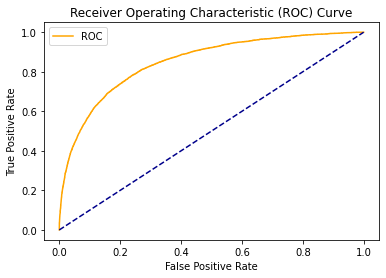

In [331]:
plot_roc_curve(fpr,tpr)

In [332]:
print('Roc auc score',roc_auc_score(y_test, final_pred3))

Roc auc score 0.8494937058011884


In [333]:
final_pred3A = final_pred3.copy()

In [334]:
final_pred3A.loc[final_pred3A[0] >=0.432852 , 0] = 1
final_pred3A.loc[final_pred3A[0] <=0.432852 , 0] = 0

In [335]:
print("Accuracy:",accuracy_score(y_test, final_pred3A))
print("Precision:",precision_score(y_test, final_pred3A))
print("Recall:",recall_score(y_test, final_pred3A))

Accuracy: 0.7497146932952924
Precision: 0.4625693160813309
Recall: 0.8062177835051546


In [336]:
precision_ls = []
for thres in thresolds:
    y_pred = np.where(final_pred3>thres,1,0)
    precision_ls.append(precision_score(y_test, y_pred))
    
precision_ls = pd.concat([pd.Series(thresolds), pd.Series(precision_ls)],
                        axis=1)
precision_ls.columns = ['thresolds', 'Precision']
precision_ls.sort_values(by='Precision', ascending=False, inplace=True)
precision_ls.head()

,thresolds,Precision
2,0.997466,1.000000
3,0.997403,1.000000
9,0.989095,0.980892
5,0.995600,0.980769
8,0.989162,0.980769


In [337]:
precision_ls.head(60)

,thresolds,Precision
2,0.997466,1.000000
3,0.997403,1.000000
9,0.989095,0.980892
5,0.995600,0.980769
8,0.989162,0.980769
4,0.995643,0.980392
11,0.988424,0.976471
10,0.988613,0.976331
7,0.994465,0.971831
6,0.994473,0.971429


In [338]:
precision_ls[2700:2750]

,thresolds,Precision
2704,0.655230,0.602969
2697,0.656203,0.602943
2703,0.655664,0.602939
2706,0.655211,0.602937
2698,0.655941,0.602911
2707,0.654785,0.602528
2709,0.654758,0.602496
2712,0.654662,0.602494
2711,0.654716,0.602464
2708,0.654764,0.602434


In [339]:
precision_ls[3850:3900]

,thresolds,Precision
3847,0.500728,0.501020
3853,0.500156,0.500750
3854,0.500092,0.500696
3855,0.499593,0.500161
3856,0.499528,0.500107
3857,0.499415,0.500053
3859,0.499294,0.500053
3860,0.499207,0.500053
3858,0.499296,0.500000
3862,0.498566,0.499520


In [340]:
final_pred3A = final_pred3.copy()

In [341]:
final_pred3A.loc[final_pred3A[0] >=0.498128 , 0] = 1
final_pred3A.loc[final_pred3A[0] <=0.498128 , 0] = 0

In [342]:
print("Accuracy:",accuracy_score(y_test, final_pred3A))
print("Precision:",precision_score(y_test, final_pred3A))
print("Recall:",recall_score(y_test, final_pred3A))
print("f1 score:",f1_score(y_test, final_pred3A))
print("MCC score:",matthews_corrcoef(y_test, final_pred3A))

Accuracy: 0.7780670470756063
Precision: 0.49920017063026556
Recall: 0.7540270618556701
f1 score: 0.600705806865576
MCC score: 0.4742772075494237


In [343]:
final_pred3A.mean()

0    0.334415
dtype: float64

In [344]:
y_test.shape

(28040, 1)

In [345]:
y_test.mean()

RainTomorrow    0.221398
dtype: float64

In [346]:
from sklearn.utils import resample

In [347]:
x = pd.concat([x_test,y_test],axis=1)

In [348]:
df_minority = x.loc[x['RainTomorrow']==1]
df_majority = x.loc[x['RainTomorrow']==0]

In [349]:
df_majority.shape

(21832, 19)

In [350]:
df_minority.shape

(6208, 19)

In [351]:
df_majority_downsampled = resample(df_majority,      
                                 n_samples=5000,random_state = 0)

In [352]:
df_minority_downsampled = resample(df_minority,    
                                 n_samples=5000,random_state = 0)

In [353]:
x = pd.concat([df_majority_downsampled,df_minority_downsampled],axis=0)

In [354]:
x.shape

(10000, 19)

In [355]:
x['RainTomorrow'].mean()

0.5

In [356]:
x = x.reset_index(drop=True)

In [357]:
x_test2 = x.drop('RainTomorrow',axis=1)
y_test2 = x['RainTomorrow']

y_test2 = pd.DataFrame(y_test2)

In [358]:
lr.predict_proba(x_test2)
y_test_pred4 = lr.predict_proba(x_test2)[:,1]
final_pred3 = pd.DataFrame(y_test_pred4)
final_pred3.head()

,0
0,0.113553
1,0.388124
2,0.053168
3,0.595317
4,0.375219


In [359]:
final_pred3A = final_pred3.copy()

final_pred3A.loc[final_pred3A[0] >=0.498128 , 0] = 1
final_pred3A.loc[final_pred3A[0] <=0.498128 , 0] = 0

print("Accuracy:",accuracy_score(y_test2, final_pred3A))
print("Precision:",precision_score(y_test2, final_pred3A))
print("Recall:",recall_score(y_test2, final_pred3A))

Accuracy: 0.7738
Precision: 0.7822680412371134
Recall: 0.7588


In [360]:
y_test_pred5 = lr.predict_proba(x_test)[:,1]
y_test_pred5

array([0.08396109, 0.23430583, 0.87506068, ..., 0.02303468, 0.25958717,
       0.90783166])

In [361]:
final_pred5 = pd.DataFrame(y_test_pred5)
final_pred5.head()

,0
0,0.083961
1,0.234306
2,0.875061
3,0.710619
4,0.015716


In [362]:
y_test

,RainTomorrow
0,0
1,0
2,1
3,0
4,0
...,...
28035,1
28036,0
28037,0
28038,0


In [363]:
fpr , tpr , thresolds = roc_curve(y_test , final_pred5)
thresolds

array([1.99960247e+00, 9.99602473e-01, 9.97466244e-01, ...,
       1.92177486e-02, 1.92045148e-02, 1.99812308e-03])

In [364]:
recall_ls = []
for thres in thresolds:
    y_pred = np.where(final_pred5>thres,1,0)
    recall_ls.append(recall_score(y_test, y_pred))
    
recall_ls = pd.concat([pd.Series(thresolds), pd.Series(recall_ls)],
                        axis=1)
recall_ls.columns = ['thresolds', 'recall']
recall_ls.sort_values(by='recall', ascending=False, inplace=True)
recall_ls.head()

,thresolds,recall
6569,0.001998,1.000000
6568,0.019205,0.999839
6567,0.019218,0.999839
6566,0.022832,0.999678
6565,0.022863,0.999678


In [365]:
recall_ls[2330:2370]

,thresolds,recall
4240,0.448643,0.793170
4238,0.449065,0.793009
4237,0.449073,0.793009
4236,0.449217,0.792848
4235,0.449266,0.792848
4234,0.449435,0.792687
4233,0.449480,0.792687
4232,0.449534,0.792526
4231,0.449682,0.792365
4229,0.449770,0.792204


In [366]:
recall_ls[2150:2200]

,thresolds,recall
4419,0.426578,0.811695
4418,0.426674,0.811534
4417,0.426685,0.811534
4415,0.426755,0.811372
4416,0.426728,0.811372
4414,0.426900,0.811211
4413,0.427061,0.811050
4412,0.427214,0.810889
4411,0.427301,0.810889
4410,0.427374,0.810728


In [367]:
final_pred5A  = final_pred5.copy()

In [368]:
final_pred5A.loc[final_pred5[0] >=0.439516 , 0] = 1
final_pred5A.loc[final_pred5[0] <=0.439516 , 0] = 0

In [369]:
print("Accuracy:",accuracy_score(y_test, final_pred5A))
print("Precision:",precision_score(y_test, final_pred5A))
print("Recall:",recall_score(y_test, final_pred5A))

Accuracy: 0.7530670470756062
Precision: 0.4664039039039039
Recall: 0.8005798969072165


In [370]:
print('Roc auc score',roc_auc_score(y_test, final_pred5A))

Roc auc score 0.7700682555257959


In [371]:
lr.predict_proba(x_test2)
y_test_pred4 = lr.predict_proba(x_test2)[:,1]
final_pred3 = pd.DataFrame(y_test_pred4)
final_pred3.head()

final_pred3A = final_pred3.copy()

final_pred3A.loc[final_pred3A[0] >=0.439516 , 0] = 1
final_pred3A.loc[final_pred3A[0] <=0.439516 , 0] = 0

print("Accuracy:",accuracy_score(y_test2, final_pred3A))
print("Precision:",precision_score(y_test2, final_pred3A))
print("Recall:",recall_score(y_test2, final_pred3A))

Accuracy: 0.7723
Precision: 0.7555847568988173
Recall: 0.805


In [372]:
print("f1 score:",f1_score(y_test2, final_pred3A))
print("MCC score:",matthews_corrcoef(y_test2, final_pred3A))

f1 score: 0.779510022271715
MCC score: 0.5457684201467504
